In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import mannwhitneyu

## 1. Scipy
### Linear Algebra
#### a. Define a matrix A

In [4]:
A = np.array([[1, -2, 3], [4, 5, 6], [7, 1, 9]])
A

array([[ 1, -2,  3],
       [ 4,  5,  6],
       [ 7,  1,  9]])

#### b. Define a vector b

In [6]:
b = np.array([1, 2, 3])
b

array([1, 2, 3])

#### c. Solve the linear system of equations A x = b

In [8]:
x = linalg.solve(A, b)

#### d. Check that your solution is correct by plugging it into the equation

In [10]:
np.dot(A, x) == b

array([ True,  True,  True])

#### e. Repeat steps a-d using a random 3x3 matrix B (instead of the vector b)

In [12]:
B = np.random.randint(0, 10, (3, 3))
x = linalg.solve(A, B)
B_hat = np.dot(A, x)

In [13]:
B

array([[3, 9, 1],
       [1, 3, 3],
       [5, 1, 7]])

In [14]:
B_hat

array([[3., 9., 1.],
       [1., 3., 3.],
       [5., 1., 7.]])

#### f. Solve the eigenvalue problem for the matrix A and print the eigenvalues and eigenvectors

In [16]:
eigvalA = linalg.eigvals(A)
eigvecAL = linalg.eig(A, left=True, right=False)[1]
eigvecAR = linalg.eig(A, left=False, right=True)[1]

print('Eigenvalues of A:\n', eigvalA)
print('Normalized left eigenvector of A:\n', eigvecAL)
print('Normalized right eigenvector of A:\n', eigvecAR)

Eigenvalues of A:
 [-1.13261772+0.j 10.67269524+0.j  5.45992248+0.j]
Normalized left eigenvector of A:
 [[-0.82621136  0.56991782  0.46202633]
 [-0.34239727 -0.05642352 -0.61053994]
 [ 0.44736887  0.8197622   0.64325163]]
Normalized right eigenvector of A:
 [[-0.8215735   0.05324273  0.25636602]
 [-0.02150583  0.74309552 -0.93563185]
 [ 0.56969684  0.66706391 -0.24263037]]


#### g. Calculate the inverse, determinant of A

In [18]:
A_inv = linalg.inv(A)
print('Inverse of A:\n', A_inv)

Inverse of A:
 [[-0.59090909 -0.31818182  0.40909091]
 [-0.09090909  0.18181818 -0.09090909]
 [ 0.46969697  0.22727273 -0.1969697 ]]


In [19]:
detA = linalg.det(A)
print('Determinant of A:\n %.2f' %detA)

Determinant of A:
 -66.00


In [20]:
detA_inv = linalg.det(A_inv)
print('Determinant of A^{-1}:\n %.4f' %detA_inv)

Determinant of A^{-1}:
 -0.0152


#### h. Calculate the norm of A with different orders

In [22]:
norm_A = linalg.norm(A)
print('Norm of A:\n %.2f' %norm_A)

norm_A = linalg.norm(A,'nuc')
print('Nuclear norm of A:\n %.2f' %norm_A)

norm_A = linalg.norm(A,1)
print('First order norm of A:\n %.2f' %norm_A)

norm_A = linalg.norm(A,2)
print('Second order norm of A:\n %.2f' %norm_A)

Norm of A:
 14.90
Nuclear norm of A:
 19.69
First order norm of A:
 18.00
Second order norm of A:
 14.17


### Statistics
#### a. Create a discrete random variable with poissonian distribution and plot its probability mass function (PMF), cummulative distribution function (CDF) and a histogram of 1000 random realizations of the variable

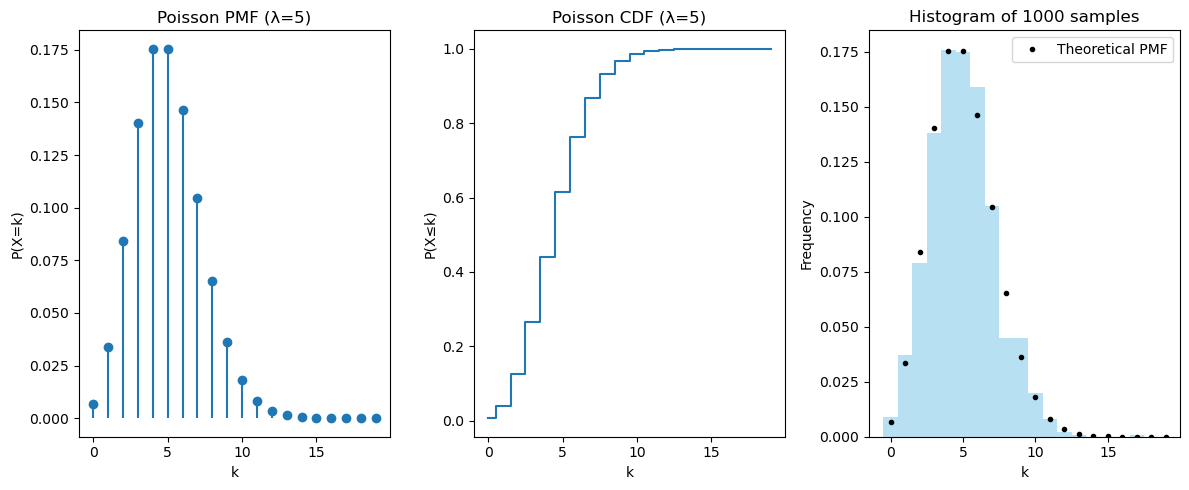

In [24]:
# Define the Poisson distribution with a mean (lambda) of 5
lambda_param = 5
rv = poisson(mu=lambda_param)

# Generate values for plotting PMF and CDF, creating PMF and CDF
x = np.arange(0, 20)
pmf_values = rv.pmf(x)
cdf_values = rv.cdf(x)

# 1000 random realizations from the distribution
samples = rv.rvs(size=1000)

# Plotting
plt.figure(figsize=(12, 5))

# Plot PMF
plt.subplot(1, 3, 1)
plt.stem(x, pmf_values, basefmt=" ")
plt.title('Poisson PMF (λ=5)')
plt.xlabel('k')
plt.ylabel('P(X=k)')

# Plot CDF
plt.subplot(1, 3, 2)
plt.step(x, cdf_values, where='mid')
plt.title('Poisson CDF (λ=5)')
plt.xlabel('k')
plt.ylabel('P(X≤k)')

# Plot histogram of 1000 samples
plt.subplot(1, 3, 3)
plt.hist(samples, bins=np.arange(0, 20)-0.5, density=True, alpha=0.6, color='skyblue')
plt.plot(x, pmf_values, 'k.', label='Theoretical PMF')
plt.title('Histogram of 1000 samples')
plt.xlabel('k')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

#### b. Create a continious random variable with normal distribution and plot its probability mass function (PMF), cummulative distribution function (CDF) and a histogram of 1000 random realizations of the variable

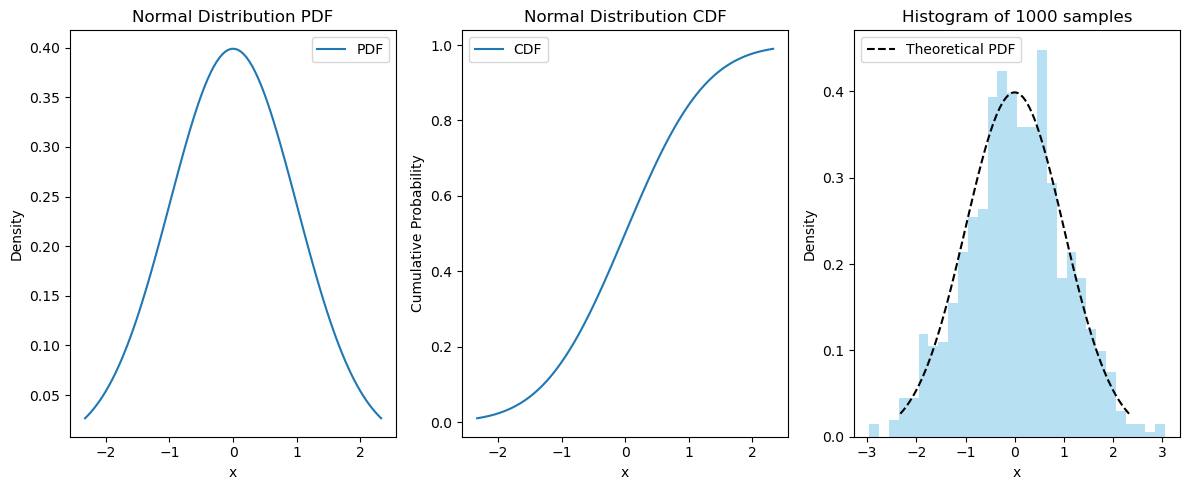

In [26]:
# Create the distribution
rv = norm()

# Generate values for plotting and the PDF (not PMF because continuous??) and CDF
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
pdf_values = rv.pdf(x)
cdf_values = rv.cdf(x)

# 1000 random realizations from the distribution
samples = rv.rvs(size=1000)

# Plot
plt.figure(figsize=(12, 5))

# Plot PDF
plt.subplot(1, 3, 1)
plt.plot(x, pdf_values, label='PDF')
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Plot CDF
plt.subplot(1, 3, 2)
plt.plot(x, cdf_values, label='CDF')
plt.title('Normal Distribution CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()

# Plot istogram of 1000 samples
plt.subplot(1, 3, 3)
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue')
plt.plot(x, pdf_values, 'k--', label='Theoretical PDF')
plt.title('Histogram of 1000 samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### c. Test if two sets of (independent) random data comes from the same distribution

Mann-Whitney U statistic:
 364048.00
p-value:
 0.00000
The samples come from different distributions.


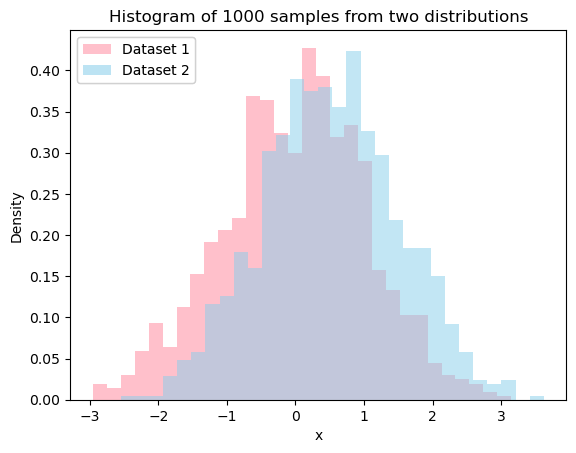

In [28]:
# Generate two sets of independent random data, 
# deciding mean mu and standard deviation sigma for each distribution
mu1, sigma1 = 0,1
mu2, sigma2 = 0.5,1

set1 = np.random.normal(mu1,sigma1,1000)
set2 = np.random.normal(mu2,sigma2,1000)

# Mann-Whitney U test
statistic, p_value = mannwhitneyu(set1, set2)

print('Mann-Whitney U statistic:\n %.2f' %statistic)
print('p-value:\n %.5f' %p_value)

alpha = 0.05
if p_value < alpha:
    print("The samples come from different distributions.")
else:
    print("The samples may come from the same distribution.")

fig, ax = plt.subplots()
ax.hist(set1, bins=30, density=True, color='pink', alpha=1)
ax.hist(set2, bins=30, density=True, color='skyblue', alpha=0.5)
ax.set_title('Histogram of 1000 samples from two distributions')
ax.set_xlabel('x')
ax.set_ylabel('Density')
leg = ax.legend(['Dataset 1','Dataset 2'], loc="upper left")
ax.add_artist(leg)
plt.show()